<a href="https://colab.research.google.com/github/ykitaguchi77/Strabismus_AI_project/blob/main/5-fold%20crossvalidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Strabismus 5-fold crossvalidation**

In [ ]:
"""
CSVを作成し、ファイル名-正解-予測を記載

データを5分割（division1~5)
set1: 1がtest、2~5がtrain
set2: 2がtest、1、3~5がtrain
set3:
set4: 
set5: 5がtest、1~4がtrain
それぞれのdivisionに、exoとcontのフォルダを置いておく

各セットについてトレーニング→CSVに予測の結果を記載していく
全てのデータが揃ったら、正解-予測のデータから、正解率、感度、特異度、ROC curveの計算を行う
"""

#**Split dataset for Crossvalidation**
trainセットを５分割、うち1つをvalセット、残りの合計をtestセットに分割

In [2]:
import random
import glob
import os
import shutil
import numpy as np
import time
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


'''
-----orig_data-----grav
                |--cont
↓
↓

-----dst_data[0]------dst_train[0]----grav
  |                |               |-- cont
  |                |--dst_val[0]------grav
  |                                |--cont
  |
  |--dst_data[1]------dst_train[1]----grav
  |                |               |-- cont
  |                |--dst_val[1]------grav
  |                                |--cont
  ...
  |--dst_data[1]------dst_train[9]----grav
                   |               |-- cont
                   |--dst_val[9]------grav
                                   |--cont
'''

Mounted at /content/drive


'\n-----orig_data-----grav\n                |--cont\n↓\n↓\n\n-----dst_data[0]------dst_train[0]----grav\n  |                |               |-- cont\n  |                |--dst_val[0]------grav\n  |                                |--cont\n  |\n  |--dst_data[1]------dst_train[1]----grav\n  |                |               |-- cont\n  |                |--dst_val[1]------grav\n  |                                |--cont\n  ...\n  |--dst_data[1]------dst_train[9]----grav\n                   |               |-- cont\n                   |--dst_val[9]------grav\n                                   |--cont\n'

In [3]:
def get_path(orig_path, dst_path, split_num):
    classes = os.listdir(orig_path) #クラス名を取得
    #データの分割数を設定
    data_list = [0]*len(classes)
    k=0
    for i in classes:
        data_list[k] = glob.glob(orig_path+'/'+i+'/*')
        k+=1
    split_length = int(len(data_list)/split_num)
    return data_list, classes, split_length

def makefolder(orig_path, dst_path, classes):
    #フォルダを作成
    if os.path.exists(dst_path):
        shutil.rmtree(dst_path)
        print("Existing dataset deleted.")
    elif not os.path.exists(dst_path):  # ディレクトリがなかったら
        os.mkdir(dst_path)  # 作成したいフォルダ名を作成
        for i in range(split_num):
            os.mkdir(dst_path+'/'+str(i))
            os.mkdir(dst_path+'/'+str(i)+'/train')
            os.mkdir(dst_path+'/'+str(i)+'/val')
            for j in classes:
                os.mkdir(dst_path+'/'+str(i)+'/train/'+j)
                os.mkdir(dst_path+'/'+str(i)+'/val/'+j)

def split_data_list(data_list, split_num):
    split_data, dst_data, dst_train, dst_val, dst_test = [0]*split_num, [0]*split_num, [0]*split_num, [0]*split_num, [0]*split_num

    #データの分割
    split_data = list(np.array_split(data_list, split_num))

    #データセット全体と分割したデータの差分を取り、dst_dataに格納

    dst_data = [0] * split_num
    for i in range(split_num):
        dst_data[i] = [x for x in data_list if x not in split_data[i]]

    #トレーニングセット、バリデーションセット、テストセットのリスト作成
    for i in range(split_num):
        dst_train[i] = dst_data[i]
        dst_val[i] = split_data[i]  #テストセット
    
    return dst_train, dst_val

def copy_to_folders(split_num, class_name, dst_train, dst_val, dst_path):
    k=0
    for i in range(split_num):
        dst_path_train = dst_path +'/'+str(i)+'/train/'+class_name
        dst_path_val = dst_path +'/'+str(i)+'/val/'+class_name
        for p in dst_train[k]:  # 選択したファイルを目的フォルダにコピー
            shutil.copy(p, dst_path_train)
            #print(p)
            print(dst_path_train)

        for p in dst_val[k]:  # 選択したファイルを目的フォルダにコピー
            shutil.copy(p, dst_path_val)
            #print(p)    
            print(dst_path_val)

        k+=1    

In [4]:
#パスの設定
orig_path = "/content/drive/MyDrive/Deep_learning/Strabismus/Dataset_250px_20211111"
dst_path = "/content/drive/MyDrive/Deep_learning/Strabismus/Dataset_250px_crossvalidation_exo"  # フォルダ名
csv_path = dst_path + "/img_list.csv"

In [5]:
#Dataの分割の設定
split_num = 5  #データをいくつに分割するかを記載
data_list, classes, split_length = get_path(orig_path, dst_path, split_num)
print(classes)

['cont', 'eso', 'exo']


In [6]:
#作成するデータのクラスを設定し直す
#疾患群を後ろにする
classes = ['cont', 'eso']

In [ ]:
#5-foldデータセットの作成
#作成済みの場合には省略
makefolder(orig_path, dst_path, classes)
print(classes)
k=0
for i in range(len(classes)):
    dst_train, dst_val = split_data_list(data_list[k], split_num)
    print(classes[k])
    copy_to_folders(split_num, classes[k], dst_train, dst_val, dst_path)
    k+=1

#**Make CSV file**

In [ ]:
classes = os.listdir(dst_path+"/0/val/")
split_num = 5
img_num = len(glob.glob(dst_path+"/*/val/*/*"))
#print(glob.glob(dst_path+"/*/val/*/*"))
#print(img_num)

#Make CSV file
cols = ["num", "division", "class", "prediction"]
df_cross = pd.DataFrame(index=list(range(img_num)), columns=cols)

t=0
for i in range(split_num):
    for j in classes:
        #print(str(i) + ", "+str(j))
        img_list = os.listdir(dst_path+"/"+str(i)+"/val/"+str(j))
        #print(img_list)
        for k in img_list:
            df_cross.iloc[t,0]=str(k)
            df_cross.iloc[t,1]=str(i)
            df_cross.iloc[t,2]=str(j)
            t+=1
df_cross

In [18]:
#CSV fileを保存
csv = df_cross.to_csv(csv_path, encoding='utf_8_sig')

#**Training & evaluation**

In [12]:
from __future__ import print_function, division
!pip install torch_optimizer

import torch
import torch.nn as nn
import torch_optimizer as optim
import torch.utils.data as data
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import math
import shutil

import glob
import os.path as osp
import random
import json
from PIL import Image
from tqdm import tqdm
%matplotlib inline

import pandas as pd
import csv

#サポートパッチのインポート
from google.colab.patches import cv2_imshow
import cv2

plt.ion()   # interactive mode
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

!pip install efficientnet_pytorch
from efficientnet_pytorch import EfficientNet 

import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [11]:
#Module群
def pre_process(data_dir):
    # 入力画像の前処理をするクラス
    # 訓練時と推論時で処理が異なる

    """
        画像の前処理クラス。訓練時、検証時で異なる動作をする。
        画像のサイズをリサイズし、色を標準化する。
        訓練時はRandomResizedCropとRandomHorizontalFlipでデータオーギュメンテーションする。


        Attributes
        ----------
        resize : int
            リサイズ先の画像の大きさ。
        mean : (R, G, B)
            各色チャネルの平均値。
        std : (R, G, B)
            各色チャネルの標準偏差。
    """

    data_transforms = {
        'train': transforms.Compose([
            transforms.RandomResizedCrop(224, scale=(0.75,1.0)),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    data_dir = data_dir
    n_samples = len(data_dir)

    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                              data_transforms[x])
                      for x in ['train', 'val']}
    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=20,
                                                shuffle=True, num_workers=4)
                  for x in ['train', 'val']}
    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
    class_names = image_datasets['train'].classes


    print(class_names)
    k=0
    for i in class_names:
        print(class_names[k]+"_train:"+str(len(os.listdir(path=data_dir + '/train/'+class_names[k]))))
        k+=1
    k=0
    for i in class_names:
        print(class_names[k]+"_val:"+str(len(os.listdir(path=data_dir + '/val/'+class_names[k]))))
        k+=1

    print("training data set_total："+ str(len(image_datasets['train'])))
    print("validating data set_total："+str(len(image_datasets['val'])))
    
    return image_datasets, dataloaders, dataset_sizes, class_names, device


#少数の画像を可視化
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


def getBatch(dataloaders):    
    # Get a batch of training data
    inputs, classes = next(iter(dataloaders['train']))

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    #imshow(out, title=[class_names[x] for x in classes])
    return(inputs, classes)

#Defining early stopping class
import numpy as np
import torch

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss


#Train models
def train_model(model, criterion, optimizer, patience, num_epochs):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # to track the training loss as the model trains
    train_loss = []
    # to track the validation loss as the model trains
    valid_loss = []


    # initialize the early_stopping object
    early_stopping = EarlyStopping(patience=patience, verbose=True)

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase] 
            
            # record train_loss and valid_loss
            if phase == 'train':
                train_loss.append(epoch_loss)
            if phase == 'val':
                valid_loss.append(epoch_loss)
            #print(train_loss)
            #print(valid_loss)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))


            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
      
      # early_stopping needs the validation loss to check if it has decresed, 
      # and if it has, it will make a checkpoint of the current model
        if phase == 'val':    
            early_stopping(epoch_loss, model)
                
            if early_stopping.early_stop:
                print("Early stopping")
                break
        print()


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, train_loss, valid_loss


#Visualize model
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)


def training(model_ft, criterion, optimizer_ft,  patience=15, num_epochs=50):
    model_ft, train_loss, valid_loss = train_model(model_ft, criterion, optimizer_ft,  patience=patience, num_epochs=num_epochs)


#対象のパスからラベルを抜き出して表示
def getlabel(image_path):
      image_name = os.path.basename(image_path)
      label = os.path.basename(os.path.dirname(image_path))
      return(image_name, label)

'''
#変形後の画像を表示
def image_transform(image_path):

    image=Image.open(image_path)

    
    #変形した画像を表示する
    transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224)])
    image_transformed = transform(image)
    plt.imshow(np.array(image_transformed))
'''

#評価のための画像下処理
def image_transform(image_path):    
    image=Image.open(image_path)
    transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    image_tensor = transform(image)

    #バッチサイズの次元を先頭に追加した4Dテンソルに変換
    image_tensor.unsqueeze_(0)
    #print(image_tensor.size())  # torch.Size([1, 3, 224, 224])
    image_tensor = image_tensor.to(device) #model_ftをGPUに載せる

    return(image_tensor)

#モデルにした処理した画像を投入して予測結果を表示
def image_eval(image_tensor, label):
    output = model_ft(image_tensor)
    #print(output.size())  # torch.Size([1, 1000])
    #print(output)

    #model_pred:クラス名前、prob:確率、pred:クラス番号
    prob, pred = torch.topk(nn.Softmax(dim=1)(output), 1)
    model_pred = class_names[pred]
    
    #甲状腺眼症のprobabilityを計算（classが0なら1から減算、classが1ならそのまま）
    prob = abs(1-float(prob)-float(pred))
 
    return model_pred, prob, pred

    """
    #probalilityを計算する
    pred_prob = torch.topk(nn.Softmax(dim=1)(output), 1)[0]
    pred_class = torch.topk(nn.Softmax(dim=1)(output), 1)[1]
    if pred_class == 1:
        pred_prob = pred_prob
    elif pred_class == 0:
        pred_prob = 1- pred_prob
    return(model_pred, pred_prob)  #class_nameの番号で出力される
    """

def showImage(image_path):
    #画像のインポート
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    #画像のリサイズ
    height = img.shape[0]
    width = img.shape[1]
    resized_img = cv2.resize(img, (int(width*300/height), 300))
    cv2_imshow(resized_img)

def calculateAccuracy (TP, TN, FP, FN):
    accuracy = (TP + TN)/ (TP + TN + FP + FN)
    precision  = TP/(FP + TP)
    recall = TP/(TP + FN)
    specificity = TN/(FP + TN)
    f_value = (2*recall*precision)/(recall+precision)
    return(accuracy, precision, recall, specificity, f_value)

"""
・True positive (TN)
・False positive (FP)
・True negative (TN)
・False negative (FN)
Accuracy = (TP + TN)/ (TP + TN + FP + FN)
Precision = TP/(FP + TP) ※positive predictive value
Recall = TP/(TP + FN)　※sensitivity
Specificity = TN/(FP + TN)
F_value = (2RecallPrecision)/(Recall+Precision)
"""

def evaluation(model_ft, testset_dir):
    #評価モードにする
    model_ft.eval()

    #testデータセット内のファイル名を取得
    image_path = glob.glob(testset_dir + "/*/*")
    #random.shuffle(image_path)  #表示順をランダムにする
    print('number of images: ' +str(len(image_path)))


    TP, FP, TN, FN, TP, FP, TN, FN = [0,0,0,0,0,0,0,0]
    image_name_list = []
    label_list = []
    model_pred_list = []
    hum_pred_list = []

    model_pred_class = []
    model_pred_prob = []

    for i in image_path:
          image_name, label = getlabel(i)  #画像の名前とラベルを取得
          image_tensor = image_transform(i)  #予測のための画像下処理
          model_pred, prob, pred = image_eval(image_tensor, label)  #予測結果を出力   
          #print('Image: '+ image_name)
          #print('Label: '+ label)
          #print('Pred: '+ model_pred)
          #showImage(i)  #画像を表示
          #print() #空白行を入れる
          time.sleep(0.1)

          image_name_list.append(image_name)
          label_list.append(label)
          model_pred_list.append(model_pred)

          model_pred_class.append(int(pred))
          model_pred_prob.append(float(prob))

          if label == class_names[0]:
              if model_pred == class_names[0]:
                  TN += 1
              else:
                  FP += 1
          elif label == class_names[1]:
              if model_pred == class_names[1]:
                  TP += 1
              else:
                  FN += 1     

    print(TP, FN, TN, FP)

    #Accuracyを計算
    accuracy, precision, recall, specificity, f_value = calculateAccuracy (TP, TN, FP, FN)
    print('Accuracy: ' + str(accuracy))
    print('Precision (positive predictive value): ' + str(precision))
    print('Recall (sensitivity): ' + str(recall))
    print('Specificity: ' + str(specificity))
    print('F_value: ' + str(f_value))

    #print(model_pred_class)
    #print(model_pred_prob)

    return TP,TN,FP,FN, accuracy, precision, recall, specificity, f_value, label_list, model_pred_prob, model_pred_class, image_path


def make_csv(roc_label_list):
    #csvのdata tableを作成
    pd.set_option('display.max_rows', 800)  # 省略なしで表示
    #columns1 = ["EfficientNet_32", "EfficientNet_64", "EfficientNet_128", "EfficientNet_256", "EfficientNet_512", "EfficientNet_558"]
    roc_label_list.extend(["avg", "std"])
    index1 = ["TP","TN","FP","FN","Accuracy","Positive predictive value","sensitity","specificity","F-value","roc_auc"]
    df = pd.DataFrame(index=index1, columns=roc_label_list)
    return df

def write_csv(df, col, TP, TN, FP, FN, accuracy, precision, recall, specificity, f_value,roc_auc):
    df.iloc[0:10, col] = TP, TN, FP, FN, accuracy, precision, recall, specificity, f_value,roc_auc 
    #print(df)

    # CSVとして出力
    #df2.to_csv("/content/drive/My Drive/Grav_bootcamp/Posttrain_model_eval_result.csv",encoding="shift_jis")
    return df

def Draw_roc_curve(label_list_list, model_pred_prob_list, sample_num_list, num_curves,class_names):

#グラフの外形を作成
    fig = plt.figure(figsize=(8.0, 6.0))
    lw = 2
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    ycolor = ["r", "g", "b", "c", "m", "y", "k", "w"]      # 各プロットの色
    plt.legend(loc="lower right")

    k=0
    for j in range(num_curves):
        y_score = []
        y_true = []

        for i in label_list_list[k]:
            if i == class_names[0]:
                  y_true.append(0)
            elif i == class_names[1]:
                  y_true.append(1)
            
        #それぞれの画像における陽性の確率についてリストを作成
        y_score = model_pred_prob_list[k]

        fpr, tpr,thred = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, color=ycolor[k],lw=lw, label= str(roc_label_list[k])+':ROC curve (area = %0.2f)' % roc_auc)
            
        k+=1

    plt.legend(loc="lower right")
    plt.show()
    return fig

def calculate_auc(label_list, model_pred_prob, class_names):
    y_true, y_score = [], []
    for i in label_list:
        if i == class_names[0]:
              y_true.append(0)
        elif i == class_names[1]:
              y_true.append(1)
            
    #それぞれの画像における陽性の確率についてリストを作成
    y_score = model_pred_prob

    print(y_true)
    print(len(y_true))
    print(y_score)
    print(len(y_score))

    fpr, tpr,thred = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    print("roc_auc: " +str(roc_auc))
    return(roc_auc, y_true, y_score)

def calcurate_ave_std(df, fold):
    for i in range(5):
        df.iloc[i,fold] = df[i,0:5].mean 

def makefolder(path):
    if not os.path.exists(path):  # ディレクトリがなかったら
        os.mkdir(path)  # 作成したいフォルダ名を作成

def prediction_results_to_df(df, img_path, pred):
    for path, pred in zip(img_path, pred):
        img_name = os.path.basename(path)
        df.loc[df["num"] == img_name, "prediction"] = pred

def convnet():
    model_ft = models.resnet50(pretrained=True)
    num_ftrs = model_ft.fc.in_features
    model_ft.fc = nn.Linear(num_ftrs, 2)

    #GPU使用
    model_ft = model_ft.to(device)

    #損失関数を定義
    criterion = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    #https://blog.knjcode.com/adabound-memo/
    #https://pypi.org/project/torch-optimizer/
    optimizer_ft = optim.AdaBound(
        model_ft.parameters(),
        lr= 1e-3,
        betas= (0.9, 0.999),
        final_lr = 0.1,
        gamma=1e-3,
        eps= 1e-8,
        weight_decay=0,
        amsbound=False,
    )
    return (model_ft, criterion, optimizer_ft)


        

5-fold cross validation
/content/drive/MyDrive/Deep_learning/Strabismus/Dataset_250px_crossvalidation_exo/0
/content/drive/MyDrive/Deep_learning/Strabismus/Dataset_250px_crossvalidation_exo/1
/content/drive/MyDrive/Deep_learning/Strabismus/Dataset_250px_crossvalidation_exo/2
/content/drive/MyDrive/Deep_learning/Strabismus/Dataset_250px_crossvalidation_exo/3
/content/drive/MyDrive/Deep_learning/Strabismus/Dataset_250px_crossvalidation_exo/4
['cont', 'exo']
cont_train:292
exo_train:238
cont_val:74
exo_val:60
training data set_total：530
validating data set_total：134
Epoch 0/49
----------
train Loss: 0.9935 Acc: 0.5547
val Loss: 1.9129 Acc: 0.5224
Validation loss decreased (inf --> 1.912889).  Saving model ...

Epoch 1/49
----------
train Loss: 0.6569 Acc: 0.6396
val Loss: 1.5131 Acc: 0.4179
Validation loss decreased (1.912889 --> 1.513125).  Saving model ...

Epoch 2/49
----------
train Loss: 0.7636 Acc: 0.5849
val Loss: 1.0412 Acc: 0.3955
Validation loss decreased (1.513125 --> 1.041247)

No handles with labels found to put in legend.


31 28 67 6
Accuracy: 0.7424242424242424
Precision (positive predictive value): 0.8378378378378378
Recall (sensitivity): 0.5254237288135594
Specificity: 0.9178082191780822
F_value: 0.6458333333333334
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
132
[0.3463090658187866, 0.4386674165725708, 0.3434954881668091, 0.392220675945282, 0.2899324893951416, 0.38760775327682495, 0.3896440863609314, 0.4394531846046448, 0.30506545305252075, 0.3618989586830139, 0.3233643174171448, 0.45809775590896606, 0.3365659713745117, 0.4590628743171692, 0.2931024432182312, 0.3169192671775818, 0.37272465229034424, 0.34830307960510254, 0.3411247134208679, 0.2900948524475

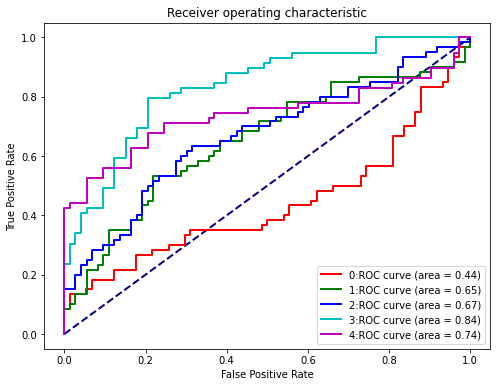

                                  0         1         2         3         4  \
TP                               14        32        31        35        31   
TN                               61        52        57        62        67   
FP                               13        21        16        11         6   
FN                               46        28        29        24        28   
Accuracy                   0.559701  0.631579  0.661654  0.734848  0.742424   
Positive predictive value  0.518519  0.603774  0.659574   0.76087  0.837838   
sensitity                  0.233333  0.533333  0.516667   0.59322  0.525424   
specificity                0.824324  0.712329  0.780822  0.849315  0.917808   
F-value                    0.321839  0.566372  0.579439  0.666667  0.645833   
roc_auc                    0.439414   0.65274  0.668721  0.836081  0.738565   

                                avg        std  
TP                             28.6     7.4458  
TN                             5

In [16]:
#まとめて解析
# 出力名を記入
out_name = "ResNet50_pretrained_all"
csv_path = dst_path + "/img_list_"+out_name+".csv"

#create data_dir_list
data_dir = dst_path
fold = split_num
print(str(fold)+'-fold cross validation')


data_dir_list = [0]*fold

for i in range(fold):
    data_dir_list[i] = data_dir + '/' + str(i)
    print(data_dir_list[i])

#create roc_label_list
roc_label_list = [0]*fold
roc_label_list = list(range(fold))
#print(roc_label_list)



df = make_csv(roc_label_list)

label_list_list, model_pred_prob_list, Y_TRUE, Y_SCORE = [],[],[],[]

#print(data_dir_list)
#print(roc_label_list)

for i, t in enumerate(zip(data_dir_list, roc_label_list)):
    image_datasets, dataloaders, dataset_sizes, class_names, device = pre_process(t[0]) #path
    inputs, classes = getBatch(dataloaders)
    model_ft, criterion, optimizer_ft = convnet()
    training(model_ft, criterion, optimizer_ft,  patience=15, num_epochs=50)  
    torch.save(model_ft.state_dict(), data_dir + '/'+str(out_name)+"_"+str(i)+".pth")    #ネットワークの保存
    TP,TN,FP,FN, accuracy, precision, recall, specificity, f_value, label_list, model_pred_prob, model_pred_class, val_img_path = evaluation(model_ft, data_dir + "/" +str(i)+"/val")
    prediction_results_to_df(df_cross, val_img_path, model_pred_class)
    roc_auc, y_true, y_score = calculate_auc(label_list, model_pred_prob, class_names)
    Y_TRUE.append(y_true)
    Y_SCORE.append(y_score)
    df = write_csv(df, i,TP,TN,FP,FN, accuracy, precision, recall, specificity, f_value, roc_auc) #numberをcsvの行として指定

    label_list_list.append(label_list)
    model_pred_prob_list.append(model_pred_prob)
    print("")
    print("")

#Draw ROC curve
fig = Draw_roc_curve(label_list_list, model_pred_prob_list, roc_label_list, len(label_list_list), class_names)

pd.set_option('display.max_columns', 100)
#それぞれの項目の平均を計算しcsvに追記する
df.iloc[0:4,fold], df.iloc[9,fold]   = df.mean(axis=1)[0:4], df.mean(axis=1)[9] 
df.iloc[0:10,fold+1] = df.std(axis=1)[0:10]
TP,TN,FP,FN = df.mean(axis=1)[0:4]
df.iloc[4:9,fold] = calculateAccuracy (TP, TN, FP, FN)
print(df)

# CSVとして出力
makefolder(data_dir + "/crossvalidation_csv")
df.to_csv(data_dir + "/crossvalidation_csv/" + out_name + ".csv",encoding="shift_jis")

#ROC_curveを保存
makefolder(data_dir + "/crossvalidation_ROCfigure")
fig.savefig(data_dir + "/crossvalidation_ROCfigure/" + out_name +".png")

#Save ROC data
makefolder(data_dir + "/crossvalidation_ROCdata")
with open(data_dir + "/crossvalidation_ROCdata/"+out_name+".csv", 'w') as f:
    writer = csv.writer(f)
    for i, t in enumerate(zip(Y_TRUE, Y_SCORE)):
        writer.writerow([t[0],t[1]])

#リストCSVを保存
df_cross.to_csv(csv_path, encoding='utf_8_sig')

#**作ったフォルダの削除**

In [24]:
dst_path = "/content/drive/MyDrive/Deep_learning/Strabismus/Dataset_250px_crossvalidation_eso"
directory = dst_path
try:
    shutil.rmtree(directory)
except FileNotFoundError:
    print("file not found")
    pass

file not found
